
Data Wrangling with Python: Activity 5, page 116

In this acitvity, you will work with Boston Housing Price dataset. The Boston house-price data has been used in many machine learning papers that address regression problems. You will read the data from a CSV file into a Pandas DataFrame and do some data basic wrangling with it.

Following are the details of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity.

CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to five Boston employment centres
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per 10,000 dollars
PTRATIO: pupil-teacher ratio by town
B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT: % of lower status of the population
PRICE: Median value of owner-occupied homes in $1000's

In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Read in the Boston housing dataset.
Bos = pd.read_csv('/Users/vishnukolluri/Documents/VISHNU_CIS/DSC540/Boston_housing.csv')

In [3]:
# Check the first 10 records.
Bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
# Find Total number of records

print(' Total number of records in the Boston Housing file is : ', len(Bos.index))

 Total number of records in the Boston Housing file is :  506


In [5]:
# Create a smaller dataframe with columns that do not include CHAS, NOX, B, and LSTAT

Bos_nw = Bos.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis=1)
Bos_nw.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2


In [6]:
# Check the last 7 records of the new dataframe.

Bos_nw.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


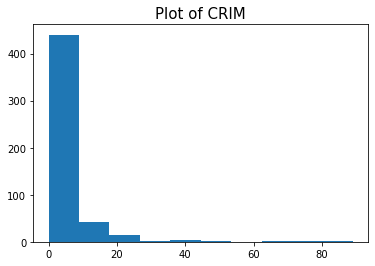

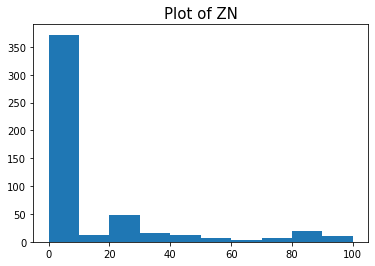

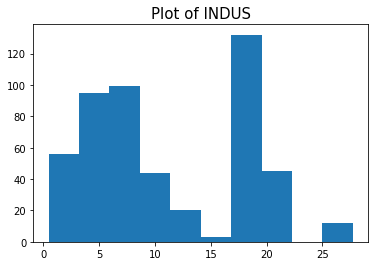

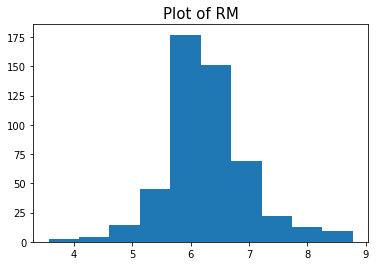

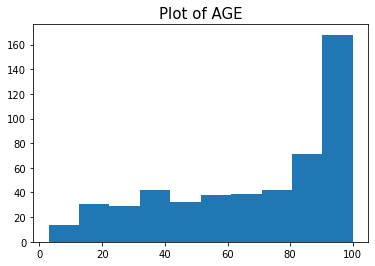

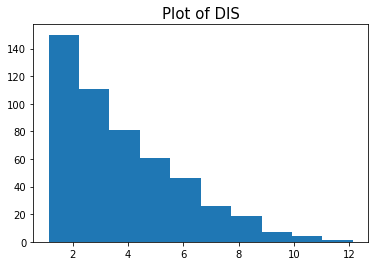

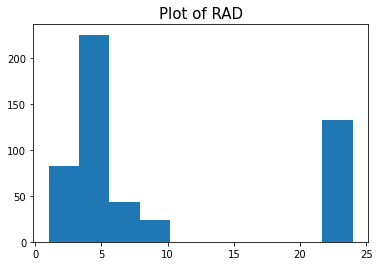

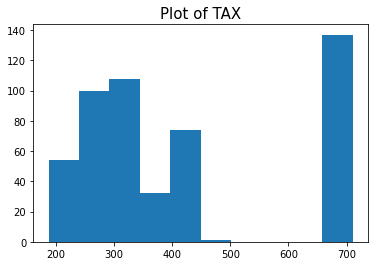

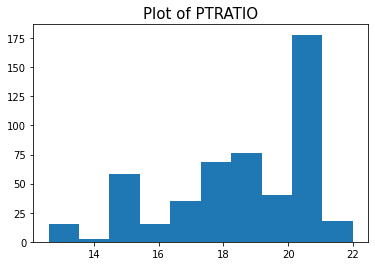

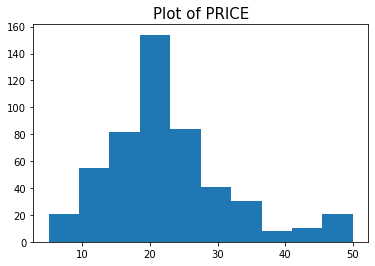

In [7]:
# Plot the histograms of all the variables in the new dataframe. Plot them all using for loop.

for x in Bos_nw.columns:
    plt.title("Plot of "+x,fontsize=15)   # Name the title of the plot
    plt.hist(Bos_nw[x])                   # Build hostogram of column
    plt.show()              

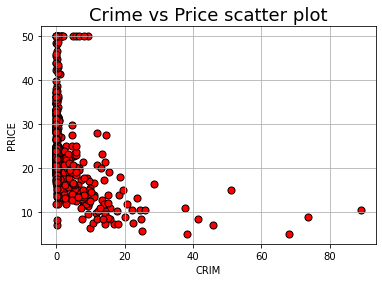

In [8]:
# Create scatter plot of crime versus price.

Bos_nw.plot.scatter('CRIM', 'PRICE', s=50, c='red', edgecolor='k')
plt.grid(True)
plt.title('Crime vs Price scatter plot', fontsize=18)
plt.show()

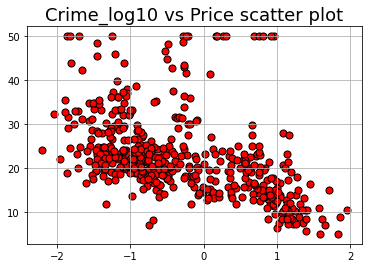

In [9]:
# Plot using log10(crime) vs price.

CRIM_lg = np.log10(Bos_nw['CRIM'])

plt.scatter(CRIM_lg, Bos_nw['PRICE'], s=50, c='red', edgecolor='k')
plt.grid(True)
plt.title('Crime_log10 vs Price scatter plot', fontsize=18)
plt.show()

In [10]:
print('mean of room per dwelling is : ', Bos_nw['RM'].mean())

mean of room per dwelling is :  6.284634387351787


In [11]:
print('median of age is : ', Bos_nw['AGE'].median())

median of age is :  77.5


In [12]:
print('mean of distance to five Boston employment centers is : ', Bos_nw['DIS'].mean())

mean of distance to five Boston employment centers is :  3.795042687747034


In [13]:
# Percentage of houses with low price(<20,000)

Count_low = Bos_nw[Bos_nw['PRICE'] < 20].count()['PRICE']      # count of low price houses
Count_all = Bos_nw['PRICE'].count()                            # count of all rows

print('percentage of houses with low price(<20k) is : ', Count_low*100/Count_all)

percentage of houses with low price(<20k) is :  41.50197628458498


 Data Wrangling with Python: Activity 6, page 171
 Leasson 4, Activity 1: Working with adult income dataset (UCI)

In this activity, you will work with Adult Income Dataset from UCI Machine Learning portal. The Adult Income data set has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a Pandas DataFrame and do practice some of the advanced data wrangling you learned in this Lesson.

URL for downloading the data

We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data download on your own so that you are familiar with the process.

Here is the URL for the data set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Here is the URL for the description of the data set and the variables (at the end of the document): https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Attributes/Variables

Following are the details of the type of the attributes of this dataset for your reference. You may have to refer them while answering question on this activity. Note that, many of the attributes are of discrete factor type. These are common type for a classification problem unlike continuous numeric values used for regression problems.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
A special note on the variable 'fnlwgt':

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and sex.
Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [14]:
# Read Adult Income Dataset from URL/CSV file

A_inc = pd.read_csv('/Users/vishnukolluri/Documents/VISHNU_CIS/DSC540/adult_income_data.csv') 
A_inc.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [15]:
# Read txt file line by line and create list of coulumn names

names = []
with open('/Users/vishnukolluri/Documents/VISHNU_CIS/DSC540/adult_income_names.txt', 'r') as t:       # Open txt file for read
    for line in t:                                  
        t.readline()                                 # read line by line
        var=line.split(":")[0]                       # end reading when encountering ':'
        names.append(var)                            # add column name into name list

names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [16]:
# Add a name of Income into list of column names.

names.append('Income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [18]:
# read the csv file again, with column with list of names as column

A_inc1 = pd.read_csv('/Users/vishnukolluri/Documents/VISHNU_CIS/DSC540/adult_income_data.csv', names=names)
A_inc1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [19]:
# Find missing value

A_inc1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [20]:
# Create dataframe with only age, education, and occupation by using subsetting

A_inc2 = A_inc1[['age', 'education', 'occupation']]
A_inc2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


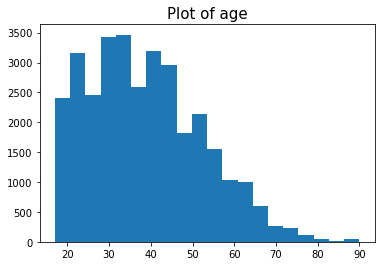

In [21]:
# Plot histogram of age wih a bin size of 20.

plt.title("Plot of age",fontsize=15)   # Name the title of the plot
plt.hist(A_inc2['age'], bins=20)       # Build hostogram of column
plt.show()                             # Show the plot

In [22]:
# Create a function to strip whitespace characters.

def strip_wt(var):
    var.strip()                       # use strip function to remove whitespace
    return

In [23]:
# Apply above function to all columns with string values.

def strip_col(var):                         # Function to create new col and strip whitespace 
    A_inc2['newcol'] = var.apply(strip_wt)
    A_inc2.var = A_inc2['newcol']           # Replace old col with new col
    
    return

# Strip whitespace from 'education' column
strip_col(A_inc2['education'])

# Strip whitespace from 'occupation' column
strip_col(A_inc2['occupation'])

A_inc2 = A_inc2.drop(['newcol'], axis=1)

A_inc2.head()

/var/folders/xh/vg90cjvs4txcrzhd8sft3m800000gn/T/ipykernel_22851/3789632909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_inc2['newcol'] = var.apply(strip_wt)


,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [24]:
# Find number of people who are gaed between 30 and 50

Count = A_inc2[(30 < A_inc2['age']) & (A_inc2['age'] < 50)].count()['age']

print('There are ', Count, ' people aged between 30 and 50.')

There are  14927  people aged between 30 and 50.


In [25]:
# Group the records based on age and education to find how the mean age is distributed. 

A_inc3 = A_inc2.groupby(['education'])['age'].mean()

# Display mean of age by education
A_inc3

education
 10th            37.429796
 11th            32.355745
 12th            32.000000
 1st-4th         46.142857
 5th-6th         42.885886
 7th-8th         48.445820
 9th             41.060311
 Assoc-acdm      37.381443
 Assoc-voc       38.553546
 Bachelors       38.904949
 Doctorate       47.702179
 HS-grad         38.974479
 Masters         44.049913
 Preschool       42.764706
 Prof-school     44.746528
 Some-college    35.756275
Name: age, dtype: float64

<AxesSubplot:xlabel='education'>

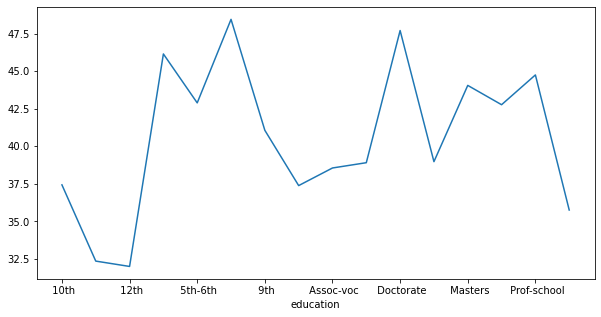

In [26]:
# Plot series of mean

A_inc3.plot(kind='line', figsize=(10,5))

In [27]:
# Group by occupation and show the summary statistics of age.
A_inc2.groupby(['occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


Detecting outlier: Is there a particular occupation group which has very low representation? Perhaps we should remove those data because with very low data the group won't be useful in analysis



<BarContainer object of 15 artists>

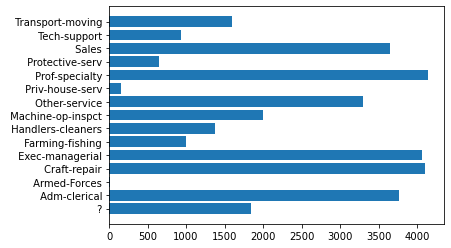

In [28]:
# Plot values on bar chart

summary = A_inc2.groupby(['occupation'])['age'].describe()  # Write summary into dataframe

plt.barh(summary.index, summary['count'])                   # PLot horizontal bar chart.

In [29]:
# Merge the data using common key

# Create 2 test datasets with one common variable.

A_inc4 = A_inc1[['age', 'education', 'occupation']].sample(5, random_state=101) #create DF with 5 sample records.
A_inc4.head()

,age,education,occupation
22357,51,HS-grad,Machine-op-inspct
26009,19,11th,Sales
20734,40,HS-grad,Exec-managerial
17695,17,10th,Handlers-cleaners
27908,61,7th-8th,Craft-repair


In [30]:
A_inc5 = A_inc1[['age', 'marital-status', 'native-country']].sample(5, random_state=101) #create DF with 5 sample records.
A_inc5.head()

,age,marital-status,native-country
22357,51,Married-civ-spouse,United-States
26009,19,Never-married,United-States
20734,40,Married-civ-spouse,United-States
17695,17,Never-married,United-States
27908,61,Married-civ-spouse,Poland


In [31]:
# Merge above 2 dataframes using age column

A_mrg = pd.merge(A_inc4, A_inc5, on='age', how='inner') 
A_mrg

,age,education,occupation,marital-status,native-country
0,51,HS-grad,Machine-op-inspct,Married-civ-spouse,United-States
1,19,11th,Sales,Never-married,United-States
2,40,HS-grad,Exec-managerial,Married-civ-spouse,United-States
3,17,10th,Handlers-cleaners,Never-married,United-States
4,61,7th-8th,Craft-repair,Married-civ-spouse,Poland


Create a series and practice basic arithmetic steps
a. Series 1 = 7.3, -2.5, 3.4, 1.5
i. Index = ‘a’, ‘c’, ‘d’, ‘e’
b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1
i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’
c. Add Series 1 and Series 2 together and print the results
d. Subtract Series 1 from Series 2 and print the results

In [32]:
# series 1

data1 = [7.3, -2.5, 3.4, 1.5]
label1 = ['a', 'c', 'd', 'e']

series1 = pd.Series(data=data1, index=label1)      # Create series
print(series1)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64


In [33]:
# Series 2

data2 = [-2.1, 3.6, -1.5, 4, 3.1]
label2 = ['a', 'c', 'e', 'f', 'g']

series2 = pd.Series(data=data2, index=label2)      # Create series
print(series2)

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [34]:
# Add both series

series_sum = series1 + series2
print(series_sum)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [35]:
# Substract series1 from series2

series_sub = series2 - series1
print(series_sub)

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64
